## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [47]:
# load data
try: 
    train = pd.read_csv("Train/proteinas_train.csv")
    test = pd.read_csv("Train/proteinas_test.csv")
    
    print("***** Data loaded successfully *****")
    print(f"Train shape: {train.shape}\nTest shape: {test.shape}\n")

    # Vertify critical columns exist
    required_cols = ['Massa_Molecular', 'Ponto_Isoelétrico', 'Classe']
    assert all(col in train.columns for col in required_cols), "Missing required columns"
except Exception as e:
    print(f"Loading Failed: {str(e)}")

***** Data loaded successfully *****
Train shape: (16000, 10)
Test shape: (4000, 10)



In [48]:
# Features
num_features = ['Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 
                'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência']

cat_features = ['ID_Proteína', 'Sequência']
target_feature = 'Classe'

In [49]:
# Missing Values
print("--- Missing Values (Train) --- ")
print(train[num_features].isnull().sum())

print("\n--- Missing Values (Test) --- ")
print(test[num_features].isnull().sum())

--- Missing Values (Train) --- 
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
dtype: int64

--- Missing Values (Test) --- 
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
dtype: int64


In [50]:
# Class distribution 
print("--- Class distribution (test) --- ")
print("* Train set *")
print(train['Classe'].value_counts())
print("\n* Test set *")
print(test['Classe'].value_counts())

--- Class distribution (test) --- 
* Train set *
Classe
Enzima        3235
Estrutural    3232
Transporte    3225
Outras        3183
Receptora     3125
Name: count, dtype: int64

* Test set *
Classe
Estrutural    863
Transporte    806
Enzima        792
Receptora     774
Outras        765
Name: count, dtype: int64


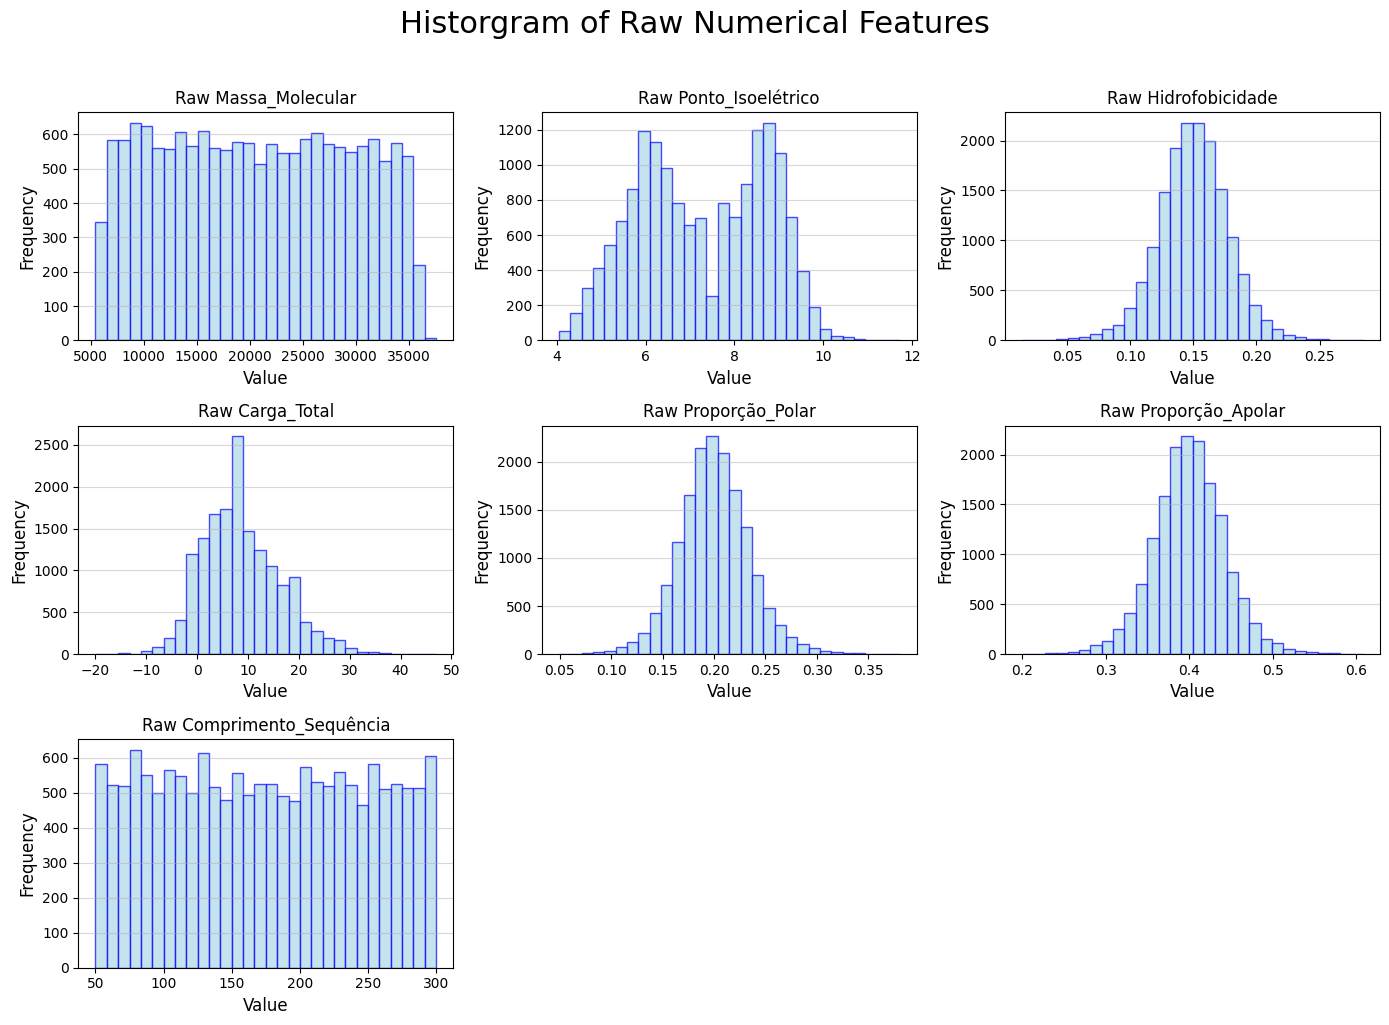

In [52]:
# (RAW DATA) Visualization of numerical features - pre-cleaning.
# Histograms of numerical features before cleaning/scaling

plt.figure(figsize=(14,10))
for i, feat in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(train[feat], bins=30, color='lightblue', alpha=0.7, edgecolor='blue')
    plt.ylabel("Frequency", fontsize=12)
    plt.xlabel("Value", fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.title(f'Raw {feat}')

plt.suptitle("Historgram of Raw Numerical Features", y =1.02, fontsize=22)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.impute import SimpleImputer
# DATA CLEANING
# Handles missing values - using median for imputation.

imputer = SimpleImputer(strategy = 'median')
train[num_features] = imputer.fit_transform(train[num_features])
test[num_features] = imputer.transform(test[num_features])

In [54]:
# Validate sequence lengths match Comprimento_Sequência
train['Seq_length_check'] = train['Sequência'].str.len() == train['Comprimento_Sequência']
test['Seq_length_check'] = test['Sequência'].str.len() == test['Comprimento_Sequência']

print(f"Mismatched sequence lengths: Train={(train['Seq_length_check'] == False).sum()}, Test={(test['Seq_length_check']== False).sum()}") 

Mismatched sequence lengths: Train=0, Test=0


In [55]:
# Removing temporary column
train.drop('Seq_length_check', axis=1, inplace = True)
test.drop('Seq_length_check', axis=1, inplace = True)

In [56]:
# Scale numerical features
scaler = StandardScaler()

# Creat copies to avoid modifying the original DF. 
test_scaled = test.copy() 
train_scaled = train.copy()

# fit the scaler on to the training data and transforms training and test data.
train_scaled[num_features] = scaler.fit_transform(train[num_features])
test_scaled[num_features] = scaler.transform(test[num_features])

print("Numerical features rescaled using StandardScaler.")

Numerical features rescaled using StandardScaler.


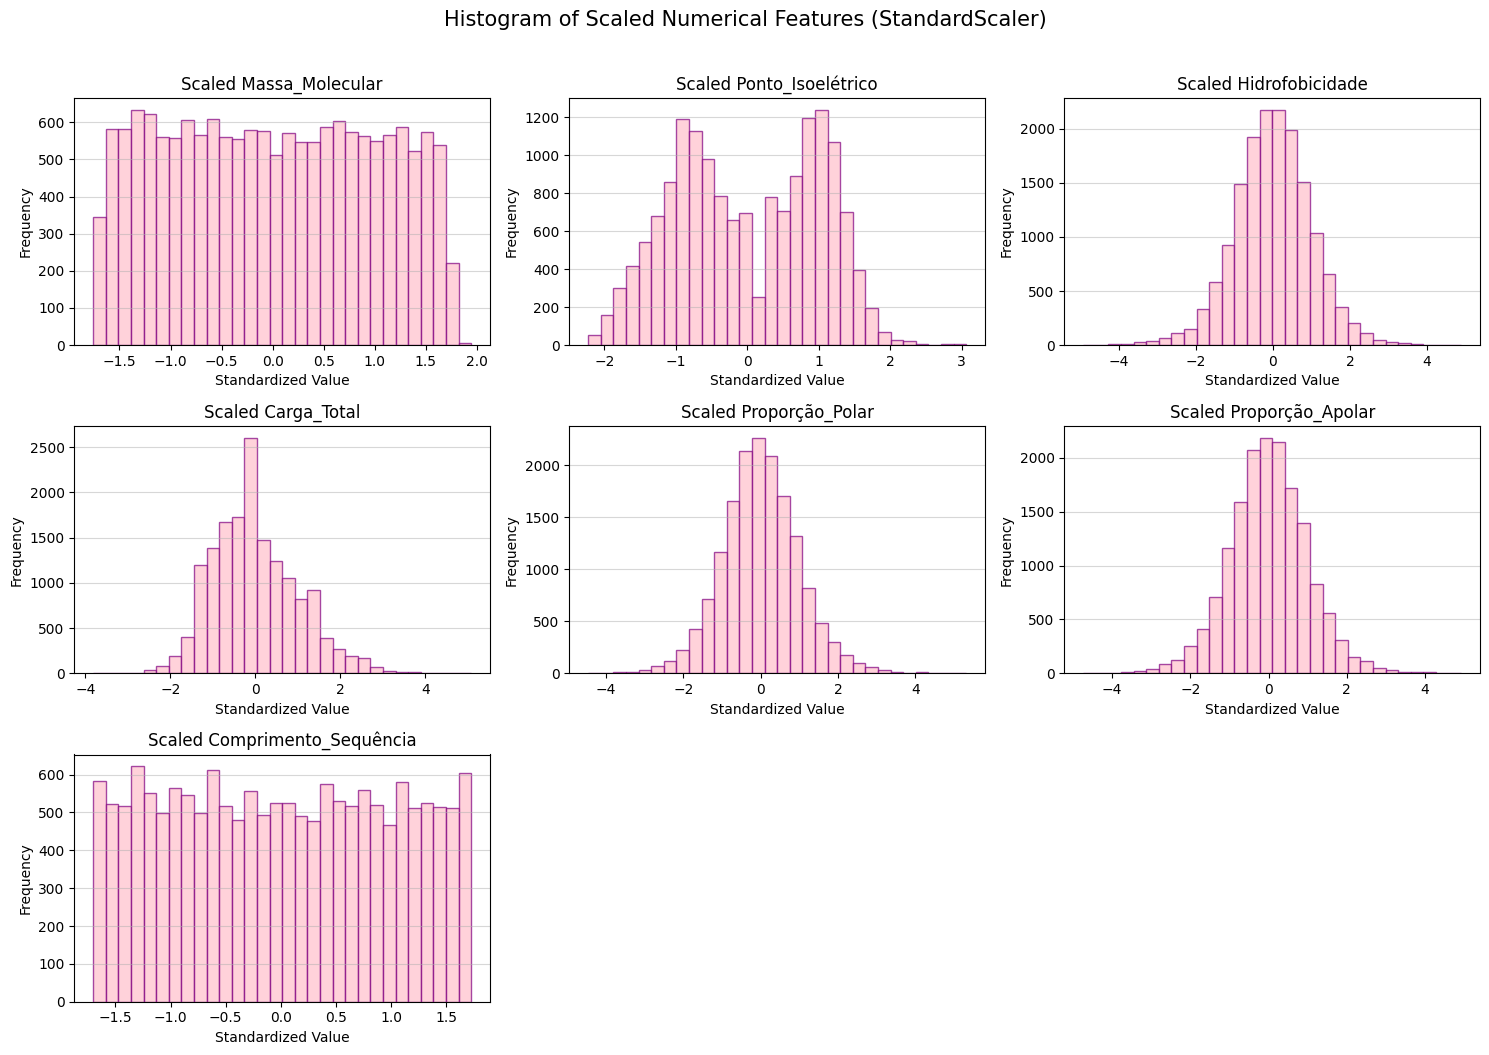

In [57]:
# visualization of scaling effect
plt.figure(figsize=(15,10))

for i, feat in enumerate(num_features, 1):
    
    plt.subplot(3, 3, i)
    plt.hist(train_scaled[feat], bins=30, color='pink', alpha=0.7, edgecolor='purple')
    plt.title (f"Scaled {feat}", fontsize=12)
    plt.xlabel("Standardized Value", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.grid(axis='y', alpha=0.5)
       
plt.tight_layout()
plt.suptitle("Histogram of Scaled Numerical Features (StandardScaler)", y=1.05, fontsize=15)
plt.show()

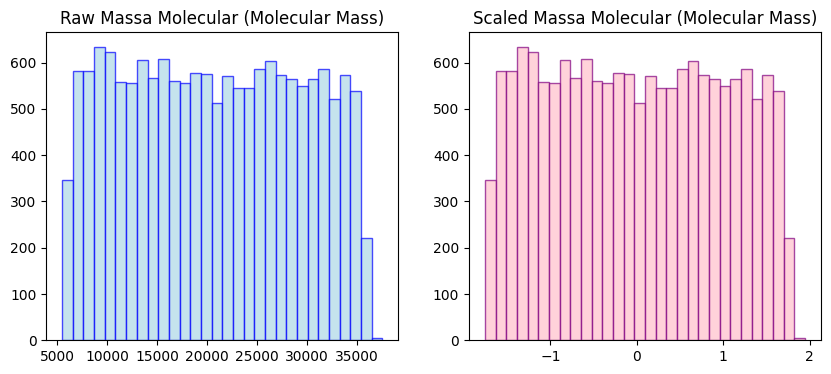

In [58]:
# visualization of scaling effect
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(train['Massa_Molecular'], bins=30, color='lightblue', alpha=0.7, edgecolor='blue')
title1 = plt.title("Raw Massa Molecular (Molecular Mass)")

plt.subplot(1,2,2)
plt.hist(train_scaled['Massa_Molecular'], bins=30, color='pink', alpha=0.7, edgecolor='purple')
title2 = plt.title("Scaled Massa Molecular (Molecular Mass)")

- Compares the scale of the 'Raw' and 'Scaled' histograms.

In [59]:
from sklearn.preprocessing import OneHotEncoder
# Categorical Encoding
# One-Hot Encode the target variable 'Classe'

encoder = OneHotEncoder(sparse_output=False, drop='first')
train_encoded_classe = pd.DataFrame(encoder.fit_transform(train[['Classe']]), 
                                    columns=encoder.get_feature_names_out(['Classe']))
test_encoded_classe = pd.DataFrame(encoder.fit_transform(train[['Classe']]),
                                   columns=encoder.get_feature_names_out(['Classe']))

# Concatenate the encoded target with scaled features.
train_final = pd.concat([train_scaled.drop(target_feature, axis=1), train_encoded_classe], axis=1)
test_final = pd.concat([test_scaled.drop(target_feature, axis=1), test_encoded_classe], axis=1)

print("Target feature ('Classe') One-Hot encoded analysis/visualization.")
print("\nFinal train columns: ", train_final.columns)
print("\nFinal test columns: ", test_final.columns)

Target feature ('Classe') One-Hot encoded analysis/visualization.

Final train columns:  Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico',
       'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
       'Comprimento_Sequência', 'Classe_Estrutural', 'Classe_Outras',
       'Classe_Receptora', 'Classe_Transporte'],
      dtype='object')

Final test columns:  Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico',
       'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
       'Comprimento_Sequência', 'Classe_Estrutural', 'Classe_Outras',
       'Classe_Receptora', 'Classe_Transporte'],
      dtype='object')


In [60]:
# Final Data Check
# Binary classification 
train_final = train_scaled.copy()
test_final = test_scaled.copy()
    
print("Target feature ('Classe') is binary (One-Hot encoded not applied for modeling).")
print("\nFinal train columns: ", train_final.columns.tolist())
print("\nFinal test columns: ", test_final.columns.tolist())

Target feature ('Classe') is binary (One-Hot encoded not applied for modeling).

Final train columns:  ['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência', 'Classe']

Final test columns:  ['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência', 'Classe']


### Feature from Protein Sequences

In [61]:
# Calculate amino acidc compostion features

def calc_aa_features(sequence):
    """ Calculate various amino acids from sequnces """
    if pd.isna(sequence):
        return pd.Series([np.nan]*6)
        
    aa_counts = pd.Series(list(sequence)).value_counts(normalize=True)
    return pd.Series({
        'Hydrophobic_AA': aa_counts.reindex(['A','V','L','I','P','F','W','M'], fill_value=0).sum(),
        'Charged_AA': aa_counts.reindex(['R','H','K','D','E'], fill_value=0).sum(),
        'Polar_AA': aa_counts.reindex(['N','C','Q','S','T','Y'], fill_value=0).sum(),
        'Small_AA': aa_counts.reindex(['A','G','S','T'], fill_value=0).sum(),
        'Aromatic_AA': aa_counts.reindex(['F','W','Y','H'], fill_value=0).sum(),
        'Proline_Content': aa_counts.get('P', 0)})
    

In [30]:
# applying train and test
aa_features_train = train['Sequência'].apply(calc_aa_features)
aa_features_test = test['Sequência'].apply(calc_aa_features)

In [32]:
# adding to existing DataFrame
train = pd.concat([train, aa_features_train], axis=1)
test = pd.concat([test, aa_features_test], axis=1)

In [33]:
# Update numerical feature list
new_aa_features = ['Hydrophobic_AA', 'Charged_AA', 'Polar_AA', 
                   'Small_AA', 'Aromatic_AA', 'Proline_Content']

num_features.extend(new_aa_features)

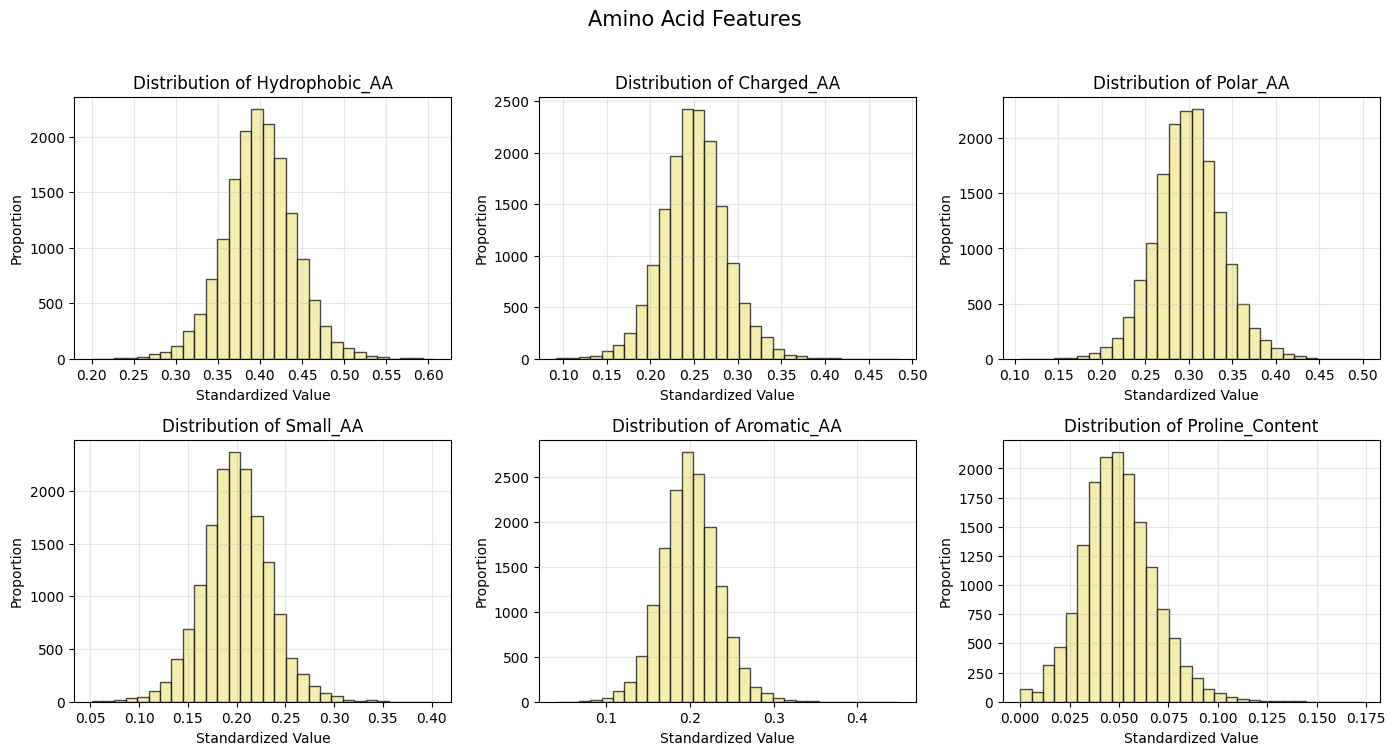

In [42]:
# Visualization of new features

plt.figure(figsize=(14,10))

for i, feat in enumerate(new_aa_features, 1):
    
    plt.subplot(3, 3, i)
    plt.hist(train[feat], bins=30, color='khaki', alpha=0.7, edgecolor='black')
    plt.title (f"Distribution of {feat}", fontsize=12)
    plt.xlabel("Standardized Value", fontsize=10)
    plt.ylabel("Proportion", fontsize=10)
    plt.grid(alpha=0.3)

       
plt.tight_layout()
plt.suptitle("Amino Acid Features", y=1.05, fontsize=15)
plt.show()

In [44]:
# removing ID column from final datasets
train_final = train_scaled.drop('ID_Proteína', axis=1)
test_final = test_scaled.drop('ID_Proteína', axis=1)
print("ID column removed from train and test sets.")

ID column removed from train and test sets.


In [64]:
print("--- Final Data Structure ---")
print("\Train columns:", train_final.columns.tolist())
print("\nTest columns:", test_final.columns.tolist())

--- Final Data Structure ---
\Train columns: ['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência', 'Classe']

Test columns: ['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência', 'Classe']


In [67]:
print("------ First 3 rows of processed train data -------")
print(train_final.head(3))

------ First 3 rows of processed train data -------
    ID_Proteína                                          Sequência  \
0  TRAIN_P00001  GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFC...   
1  TRAIN_P00002  LFKMQCSFYLLYLAKEAASYQVSMNMLCYEWYNYVYQVTVILRLSR...   
2  TRAIN_P00003  PAHLWPYWRFYVWIVFYGYHNPNYHFGMKEVKERPDCKNCTVAVLF...   

   Massa_Molecular  Ponto_Isoelétrico  Hidrofobicidade  Carga_Total  \
0        -0.039785          -1.663031        -0.020281    -1.556178   
1        -1.311270          -0.673868         2.442265    -1.158177   
2        -0.356276           0.817866         1.549457    -0.096839   

   Proporção_Polar  Proporção_Apolar  Comprimento_Sequência      Classe  
0         1.213878          0.192362              -0.000462  Estrutural  
1         0.303072          2.683715              -1.344437  Estrutural  
2        -1.723074          1.571107              -0.357027  Estrutural  
